# Minneapolis Police Stops and Police Violence

https://www.kaggle.com/datasets/paultimothymooney/minneapolis-police-stops-and-police-violence

In [1]:
# !pip install geopandas geoplot ydata-profiling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import contextily as cx

sns.set_theme(style="whitegrid")

[Minneapolis demographics](https://www.census.gov/quickfacts/fact/table/minneapoliscityminnesota/PST120222)

In [3]:
demographics_race = pd.DataFrame(
    {
        "race": ["White", "Black", "Native American", "Asian", "Latino", "Other"],
        "pop_perc": [63.1, 18.4, 1.3, 5.7, 9.8, 1.7] 
    }
)
demographics_race

,race,pop_perc
0,White,63.1
1,Black,18.4
2,Native American,1.3
3,Asian,5.7
4,Latino,9.8
5,Other,1.7


## Stops

In [4]:
# police_stop_filepath = "../data/police_stop_data.csv"
police_stop_filepath = "https://raw.githubusercontent.com/aoguedao/ds4sj-brown/main/data/police_stop_data.csv"
police_stop_df = pd.read_csv(police_stop_filepath, low_memory=False)
police_stop_df.head()

,OBJECTID,masterIncidentNumber,responseDate,reason,problem,callDisposition,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,x,y,policePrecinct,neighborhood,lastUpdateDate
0,1,16-395258,2016/10/31 22:40:47+00,NaN,Suspicious Person (P),BKG-Booking,NaN,YES,NO,Black,Black,Male,44.979570,-93.272570,-1.038306e+07,5.618306e+06,1.0,Downtown West,2017/08/08 10:25:31+00
1,2,16-395296,2016/10/31 23:06:36+00,NaN,Traffic Law Enforcement (P),TAG-Tagged,NaN,NO,NO,Unknown,Black,Male,44.962689,-93.275921,-1.038343e+07,5.615650e+06,5.0,Steven's Square - Loring Heights,2017/08/08 10:26:13+00
2,3,16-395326,2016/10/31 23:20:54+00,NaN,Attempt Pick-Up (P),RFD-Refused,NaN,NO,NO,Unknown,Unknown,Unknown,45.024836,-93.288069,-1.038478e+07,5.625432e+06,4.0,Webber - Camden,2017/08/08 10:24:35+00
3,4,16-395328,2016/10/31 23:23:20+00,NaN,Suspicious Person (P),BKG-Booking,NaN,YES,NO,Black,Black,Male,44.946560,-93.247410,-1.038025e+07,5.613112e+06,3.0,Corcoran,2017/08/08 10:25:31+00
4,5,16-395333,2016/10/31 23:26:05+00,NaN,Suspicious Vehicle (P),GOA-Gone on Arrival,NaN,NO,NO,Other,Unknown,Male,44.906170,-93.255010,-1.038110e+07,5.606762e+06,3.0,Hale,2017/08/08 10:25:03+00


In [5]:
police_stop_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
OBJECTID,210253.0,NaN,NaN,NaN,105127.0,60694.957411,1.0,52564.0,105127.0,157690.0,210253.0
masterIncidentNumber,210253,210252,21-222454,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
responseDate,210253,210079,2018/12/05 00:33:21+00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reason,169932,4,Citizen / 9-1-1,63835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
problem,210253,6,Traffic Law Enforcement (P),91026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
callDisposition,207926,30,ADV-Advised,79105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citationIssued,154956,2,NO,135183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
personSearch,186055,2,NO,164146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicleSearch,186055,2,NO,171696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
preRace,186055,8,Unknown,129513,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
police_stop_df = (
    police_stop_df.assign(
        responseDate=lambda x: pd.to_datetime(x["responseDate"]),
        year=lambda x: x["responseDate"].dt.year,
        hour=lambda x: x["responseDate"].dt.hour,
        reason=lambda x: x["reason"].fillna("N/A"),
        race=lambda x: x["race"].fillna("N/A"),
        gender=lambda x: x["gender"].fillna("N/A")
    )
)
police_stop_df.head()

,OBJECTID,masterIncidentNumber,responseDate,reason,problem,callDisposition,citationIssued,personSearch,vehicleSearch,preRace,...,gender,lat,long,x,y,policePrecinct,neighborhood,lastUpdateDate,year,hour
0,1,16-395258,2016-10-31 22:40:47+00:00,N/A,Suspicious Person (P),BKG-Booking,NaN,YES,NO,Black,...,Male,44.979570,-93.272570,-1.038306e+07,5.618306e+06,1.0,Downtown West,2017/08/08 10:25:31+00,2016,22
1,2,16-395296,2016-10-31 23:06:36+00:00,N/A,Traffic Law Enforcement (P),TAG-Tagged,NaN,NO,NO,Unknown,...,Male,44.962689,-93.275921,-1.038343e+07,5.615650e+06,5.0,Steven's Square - Loring Heights,2017/08/08 10:26:13+00,2016,23
2,3,16-395326,2016-10-31 23:20:54+00:00,N/A,Attempt Pick-Up (P),RFD-Refused,NaN,NO,NO,Unknown,...,Unknown,45.024836,-93.288069,-1.038478e+07,5.625432e+06,4.0,Webber - Camden,2017/08/08 10:24:35+00,2016,23
3,4,16-395328,2016-10-31 23:23:20+00:00,N/A,Suspicious Person (P),BKG-Booking,NaN,YES,NO,Black,...,Male,44.946560,-93.247410,-1.038025e+07,5.613112e+06,3.0,Corcoran,2017/08/08 10:25:31+00,2016,23
4,5,16-395333,2016-10-31 23:26:05+00:00,N/A,Suspicious Vehicle (P),GOA-Gone on Arrival,NaN,NO,NO,Other,...,Male,44.906170,-93.255010,-1.038110e+07,5.606762e+06,3.0,Hale,2017/08/08 10:25:03+00,2016,23


<AxesSubplot: xlabel='count', ylabel='gender'>

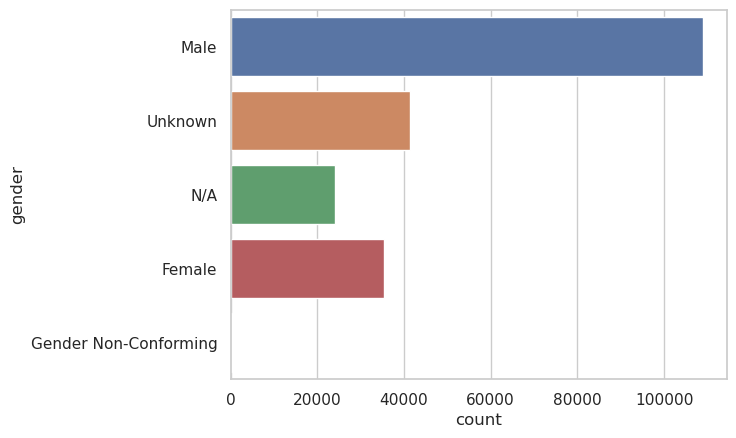

In [7]:
sns.countplot(
    data=police_stop_df,
    y="gender"
)

<AxesSubplot: xlabel='count', ylabel='race'>

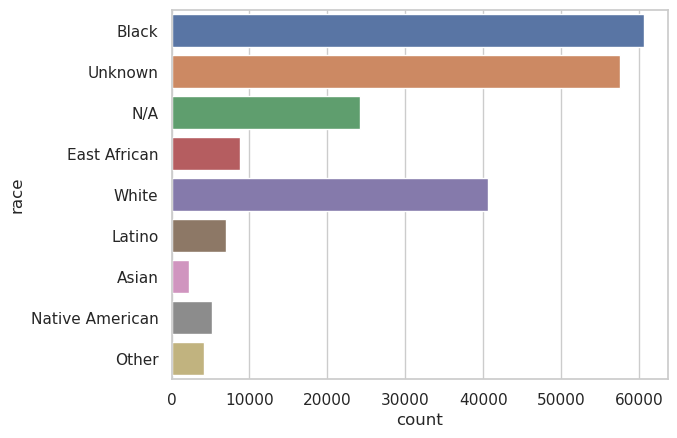

In [8]:
sns.countplot(
    data=police_stop_df,
    y="race"
)

In [9]:
police_stop_race = police_stop_df.groupby("race", as_index=False).agg(stop_nm=("OBJECTID", "count"))
police_stop_race["stop_perc"] = police_stop_race["stop_nm"] / police_stop_df.shape[0] * 100
police_stop_race

,race,stop_nm,stop_perc
0,Asian,2279,1.083932
1,Black,60572,28.809101
2,East African,8750,4.161653
3,Latino,6949,3.305066
4,N/A,24198,11.508992
5,Native American,5147,2.448003
6,Other,4188,1.991886
7,Unknown,57557,27.375115
8,White,40613,19.316252


In [10]:
police_stop_race = police_stop_race.merge(demographics_race, on="race", how="outer")
police_stop_race

,race,stop_nm,stop_perc,pop_perc
0,Asian,2279,1.083932,5.7
1,Black,60572,28.809101,18.4
2,East African,8750,4.161653,NaN
3,Latino,6949,3.305066,9.8
4,N/A,24198,11.508992,NaN
5,Native American,5147,2.448003,1.3
6,Other,4188,1.991886,1.7
7,Unknown,57557,27.375115,NaN
8,White,40613,19.316252,63.1


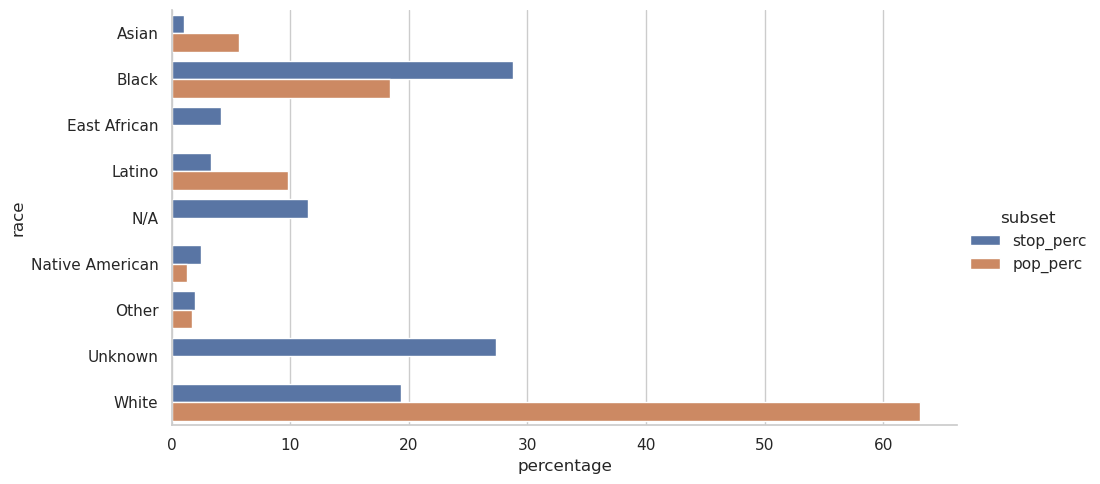

In [11]:
sns.catplot(
    data=police_stop_race.melt(id_vars="race", value_vars=["stop_perc", "pop_perc"], var_name="subset", value_name="percentage"),
    x="percentage",
    y="race",
    hue="subset",
    kind="bar",
    aspect=2
)

We have an issue here! What happened with _East African_, _N/A_ and _Unknown_?

<AxesSubplot: xlabel='count', ylabel='problem'>

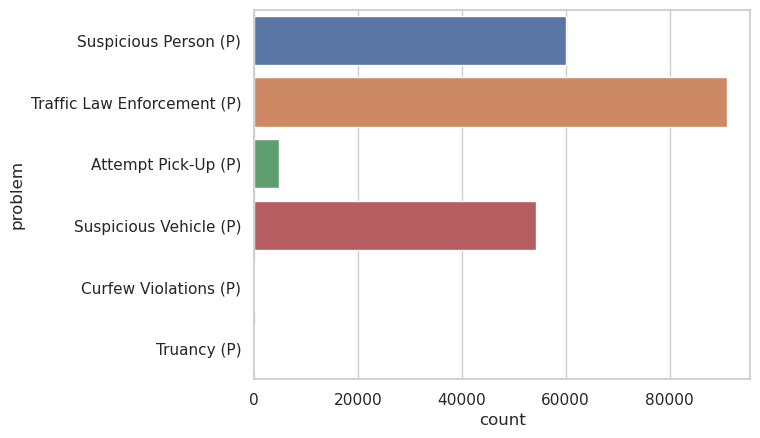

In [12]:
sns.countplot(
    data=police_stop_df,
    y="problem"
)

<AxesSubplot: xlabel='count', ylabel='problem'>

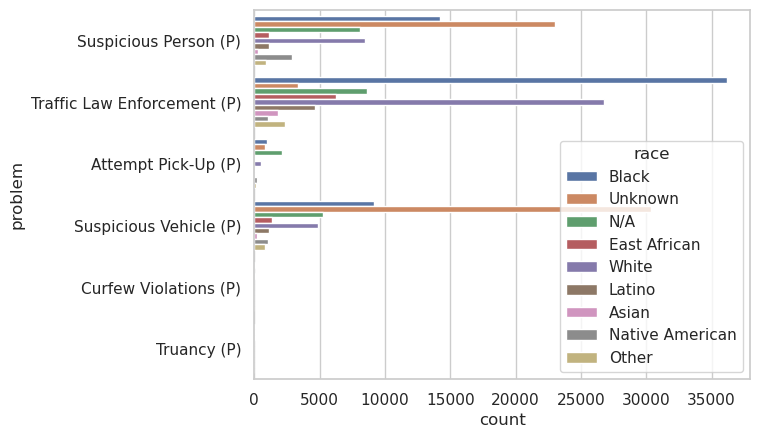

In [13]:
sns.countplot(
    data=police_stop_df,
    y="problem",
    hue="race",
)

<AxesSubplot: xlabel='problem', ylabel='race'>

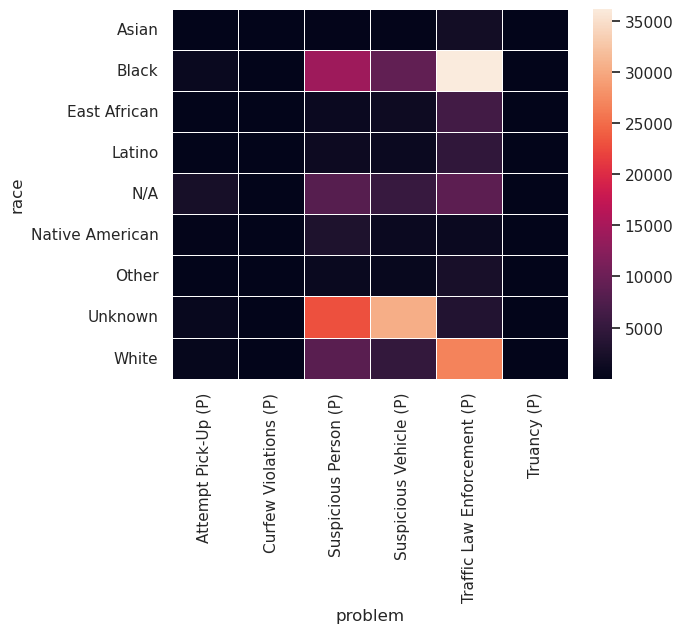

In [14]:
police_stop_by_problem_and_race = police_stop_df.pivot_table(index="race", columns="problem", values="OBJECTID", aggfunc="count")
sns.heatmap(
    police_stop_by_problem_and_race,
    linewidth=.5
)

<AxesSubplot: xlabel='count', ylabel='gender'>

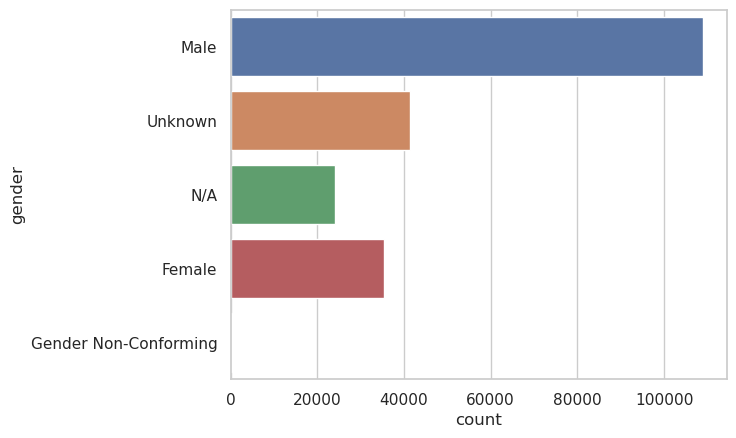

In [15]:
sns.countplot(
    data=police_stop_df,
    y="gender"
)

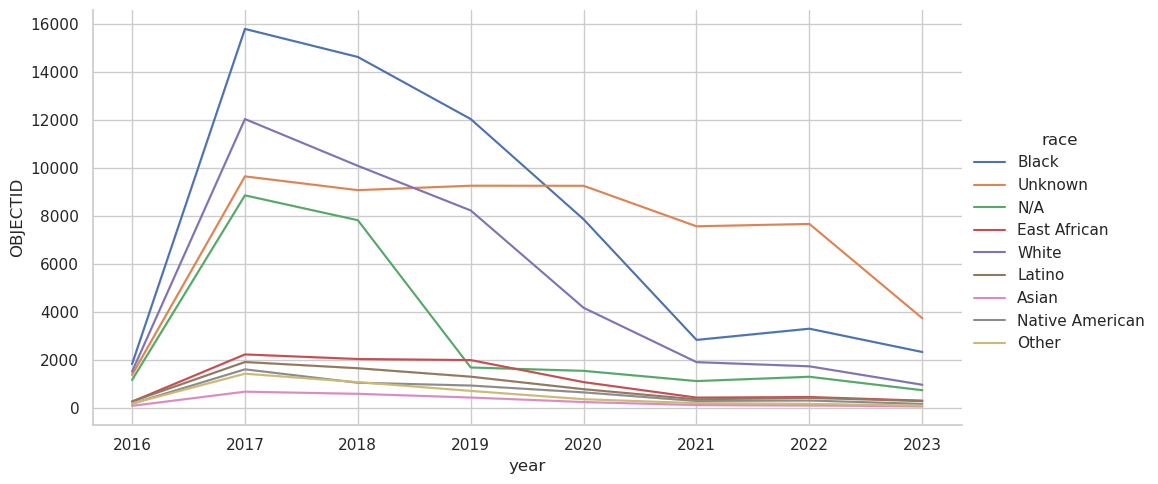

In [16]:
sns.relplot(
    data=police_stop_df,
    x="year",
    y="OBJECTID",
    hue="race",
    estimator="size",
    kind="line",
    aspect=2
)


Was 2016 a less crime year?

In [17]:
police_stop_df.loc[lambda x: x["year"] == 2016, "responseDate"].dt.month.min()

10

Data has been recorded since October 2016!

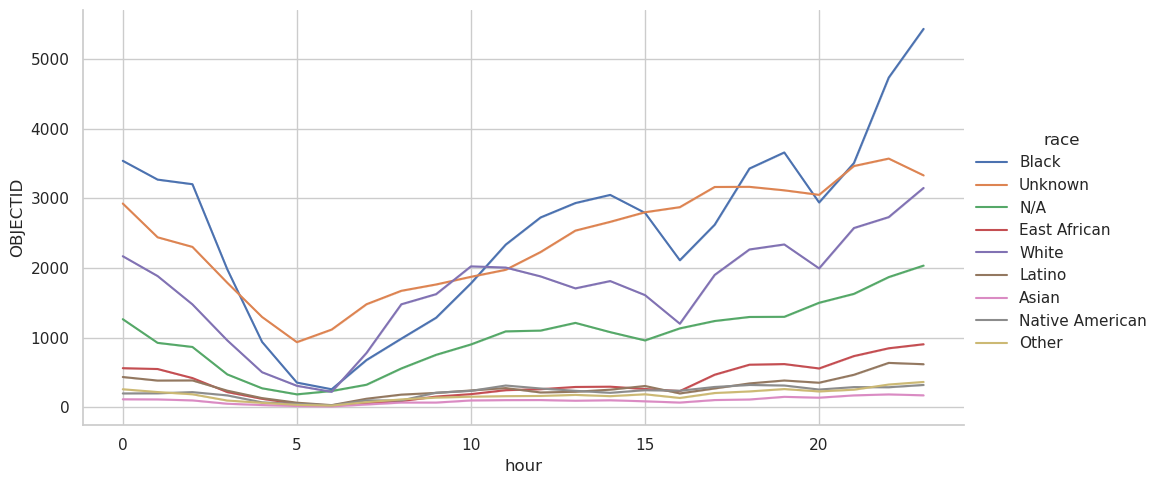

In [18]:
sns.relplot(
    data=police_stop_df,
    x="hour",
    y="OBJECTID",
    hue="race",
    estimator="size",
    kind="line",
    aspect=2
)


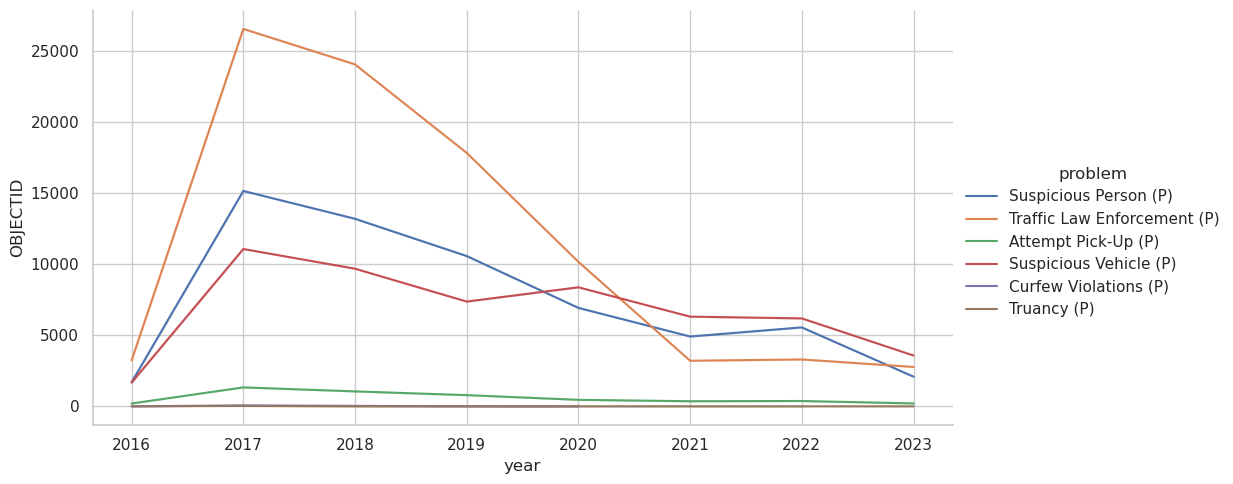

In [19]:
sns.relplot(
    data=police_stop_df,
    x="year",
    y="OBJECTID",
    hue="problem",
    estimator="size",
    kind="line",
    aspect=2
)


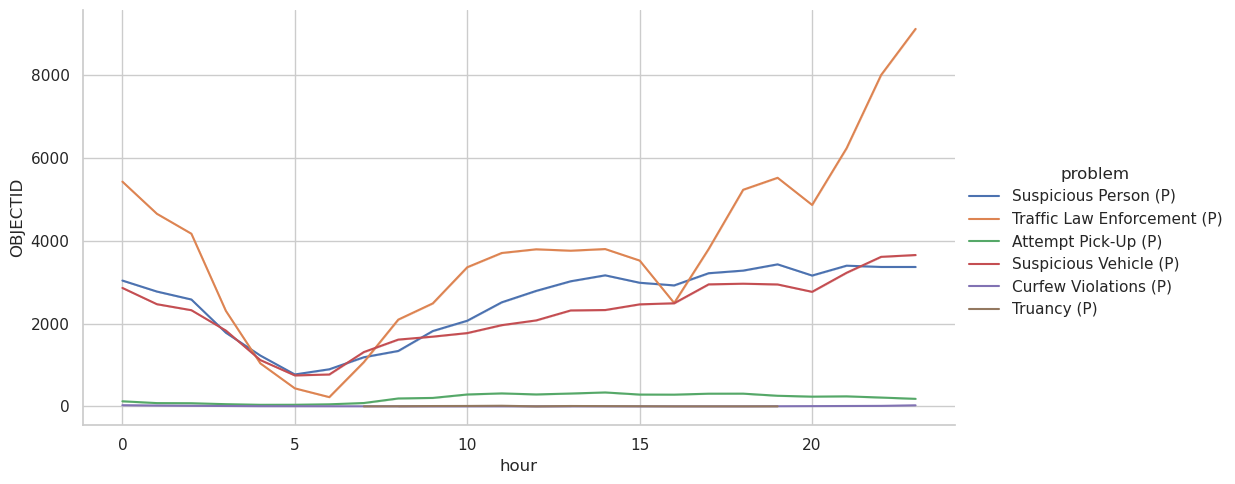

In [20]:
sns.relplot(
    data=police_stop_df,
    x="hour",
    y="OBJECTID",
    hue="problem",
    estimator="size",
    kind="line",
    aspect=2
)


## Use of Force

In [21]:
# police_force_filepath = "../data/police_use_of_force.csv"
police_force_filepath = "https://raw.githubusercontent.com/aoguedao/ds4sj-brown/main/data/police_use_of_force.csv"
police_force_df = pd.read_csv(police_force_filepath, low_memory=False)
police_force_df.head()

,X,Y,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceReportNumber,...,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear,CenterGBSID,CenterLatitude,CenterLongitude,CenterX,CenterY,DateAdded,OBJECTID
0,-93.286438,45.010118,49876125,08-018973,2008/01/19 22:53:35+00,Suspicious Vehicle,No,RECVEH,No,1,...,322402,80434.0,13679,18761,45.010118,-93.286438,-1.038460e+07,5.623115e+06,2023/06/13 08:20:27+00,1
1,-93.283381,45.005359,49876126,08-019283,2008/01/20 05:40:29+00,Domestic Abuse-In Progress,Yes,OBSTRU,No,2,...,322402,80434.0,13679,20349,45.005359,-93.283381,-1.038426e+07,5.622365e+06,2023/06/13 08:20:27+00,2
2,-93.281874,44.914179,49876127,08-024311,2008/01/25 20:34:33+00,Fight,No,FLEEFT,No,1,...,322402,55689.0,1566,12396,44.914179,-93.281874,-1.038409e+07,5.608021e+06,2023/06/13 08:20:27+00,3
3,-93.284931,45.005356,49876128,08-051094,2008/02/22 21:20:33+00,Suspicious Person,No,RECVEH,No,1,...,322402,80434.0,13679,20351,45.005356,-93.284931,-1.038443e+07,5.622365e+06,2023/06/13 08:20:27+00,4
4,-93.265106,44.963324,49876129,08-054881,2008/02/26 16:23:12+00,Suspicious Person,No,OBSTRU,No,2,...,322402,84018.0,10316,20569,44.963324,-93.265106,-1.038222e+07,5.615749e+06,2023/06/13 08:20:27+00,5


In [22]:
police_force_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X,39182.0,NaN,NaN,NaN,-89.462653,18.465417,-93.329109,-93.289353,-93.273116,-93.25755,0.0
Y,39182.0,NaN,NaN,NaN,43.13996,8.904279,0.0,44.955913,44.979156,44.995491,45.051245
PoliceUseOfForceID,39182.0,NaN,NaN,NaN,49895715.5,11311.01346,49876125.0,49885920.25,49895715.5,49905510.75,49915306.0
CaseNumber,39182,17671,21-121360,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ResponseDate,39171,16287,2021/01/01 00:00:00+00,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Problem,37498,144,Suspicious Person,5530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Is911Call,37779,2,No,19465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrimaryOffense,37787,223,OBSTRU,5329,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubjectInjury,20900,2,No,10776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ForceReportNumber,39182.0,NaN,NaN,NaN,1.697361,1.621753,0.0,1.0,1.0,2.0,49.0


In [23]:
police_force_df = (
    police_force_df.assign(
        ResponseDate=lambda x: pd.to_datetime(x["ResponseDate"]),
        year=lambda x: x["ResponseDate"].dt.year,
        hour=lambda x: x["ResponseDate"].dt.hour,
        Problem=lambda x: x["Problem"].fillna("N/A"),
        Race=lambda x: x["Race"].fillna("N/A"),
        Sex=lambda x: x["Sex"].fillna("N/A"),
        SubjectInjury=lambda x: x["SubjectInjury"].fillna("N/A"),
        ForceType=lambda x: x["ForceType"].fillna("N/A"),
    )
)
police_force_df.head()

,X,Y,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceReportNumber,...,TotalNeighborhoodCallsForYear,CenterGBSID,CenterLatitude,CenterLongitude,CenterX,CenterY,DateAdded,OBJECTID,year,hour
0,-93.286438,45.010118,49876125,08-018973,2008-01-19 22:53:35+00:00,Suspicious Vehicle,No,RECVEH,No,1,...,13679,18761,45.010118,-93.286438,-1.038460e+07,5.623115e+06,2023/06/13 08:20:27+00,1,2008.0,22.0
1,-93.283381,45.005359,49876126,08-019283,2008-01-20 05:40:29+00:00,Domestic Abuse-In Progress,Yes,OBSTRU,No,2,...,13679,20349,45.005359,-93.283381,-1.038426e+07,5.622365e+06,2023/06/13 08:20:27+00,2,2008.0,5.0
2,-93.281874,44.914179,49876127,08-024311,2008-01-25 20:34:33+00:00,Fight,No,FLEEFT,No,1,...,1566,12396,44.914179,-93.281874,-1.038409e+07,5.608021e+06,2023/06/13 08:20:27+00,3,2008.0,20.0
3,-93.284931,45.005356,49876128,08-051094,2008-02-22 21:20:33+00:00,Suspicious Person,No,RECVEH,No,1,...,13679,20351,45.005356,-93.284931,-1.038443e+07,5.622365e+06,2023/06/13 08:20:27+00,4,2008.0,21.0
4,-93.265106,44.963324,49876129,08-054881,2008-02-26 16:23:12+00:00,Suspicious Person,No,OBSTRU,No,2,...,10316,20569,44.963324,-93.265106,-1.038222e+07,5.615749e+06,2023/06/13 08:20:27+00,5,2008.0,16.0


<AxesSubplot: xlabel='count', ylabel='ForceType'>

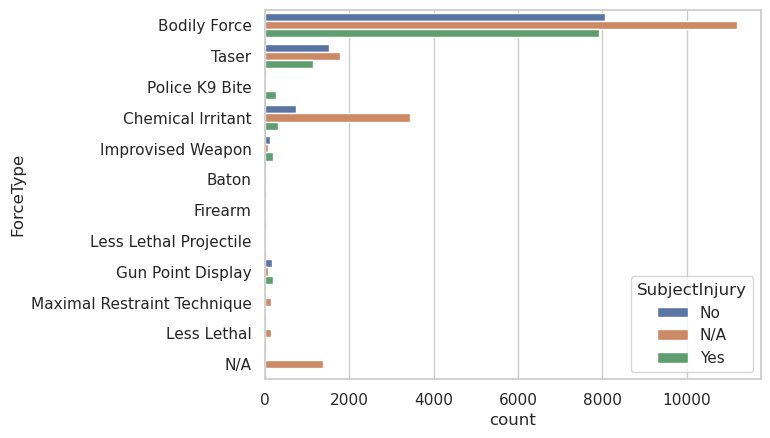

In [24]:
sns.countplot(
    data=police_force_df,
    y="ForceType",
    hue="SubjectInjury"
)

<AxesSubplot: xlabel='ForceType', ylabel='Race'>

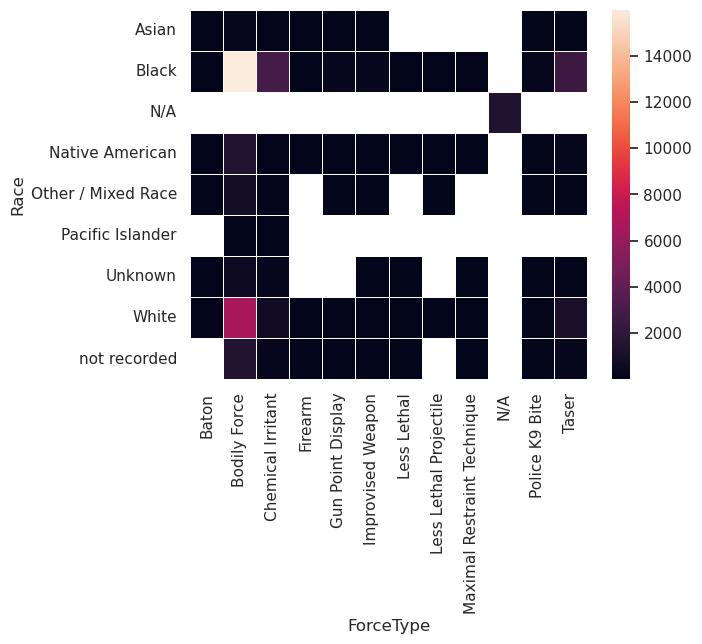

In [25]:
police_force_by_type_and_race = police_force_df.pivot_table(index="Race", columns="ForceType", values="OBJECTID", aggfunc="count")
sns.heatmap(
    police_force_by_type_and_race,
    linewidth=.5
)

<AxesSubplot: xlabel='SubjectInjury', ylabel='Race'>

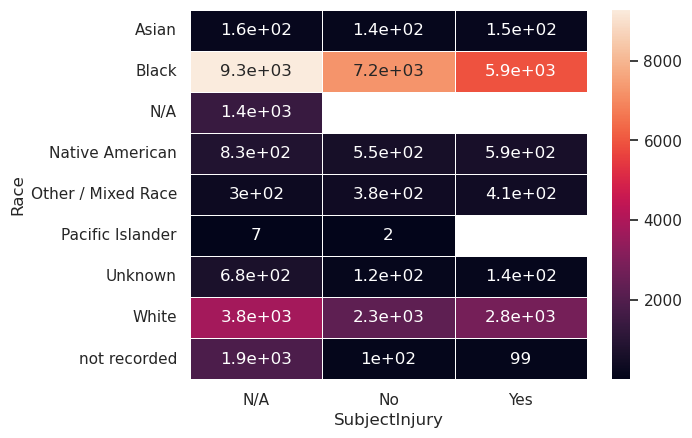

In [26]:
police_force_by_injury_and_race = police_force_df.pivot_table(index="Race", columns="SubjectInjury", values="OBJECTID", aggfunc="count")
sns.heatmap(
    police_force_by_injury_and_race,
    linewidth=.5,
    annot=True
)

In [27]:
police_force_gdf = gpd.GeoDataFrame(
    police_force_df,
    geometry=gpd.points_from_xy(police_force_df["CenterLongitude"], police_force_df["CenterLatitude"]),
    crs="EPSG:4326"
)
police_force_gdf.head()

,X,Y,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceReportNumber,...,CenterGBSID,CenterLatitude,CenterLongitude,CenterX,CenterY,DateAdded,OBJECTID,year,hour,geometry
0,-93.286438,45.010118,49876125,08-018973,2008-01-19 22:53:35+00:00,Suspicious Vehicle,No,RECVEH,No,1,...,18761,45.010118,-93.286438,-1.038460e+07,5.623115e+06,2023/06/13 08:20:27+00,1,2008.0,22.0,POINT (-93.28644 45.01012)
1,-93.283381,45.005359,49876126,08-019283,2008-01-20 05:40:29+00:00,Domestic Abuse-In Progress,Yes,OBSTRU,No,2,...,20349,45.005359,-93.283381,-1.038426e+07,5.622365e+06,2023/06/13 08:20:27+00,2,2008.0,5.0,POINT (-93.28338 45.00536)
2,-93.281874,44.914179,49876127,08-024311,2008-01-25 20:34:33+00:00,Fight,No,FLEEFT,No,1,...,12396,44.914179,-93.281874,-1.038409e+07,5.608021e+06,2023/06/13 08:20:27+00,3,2008.0,20.0,POINT (-93.28187 44.91418)
3,-93.284931,45.005356,49876128,08-051094,2008-02-22 21:20:33+00:00,Suspicious Person,No,RECVEH,No,1,...,20351,45.005356,-93.284931,-1.038443e+07,5.622365e+06,2023/06/13 08:20:27+00,4,2008.0,21.0,POINT (-93.28493 45.00536)
4,-93.265106,44.963324,49876129,08-054881,2008-02-26 16:23:12+00:00,Suspicious Person,No,OBSTRU,No,2,...,20569,44.963324,-93.265106,-1.038222e+07,5.615749e+06,2023/06/13 08:20:27+00,5,2008.0,16.0,POINT (-93.26511 44.96332)


<AxesSubplot: >

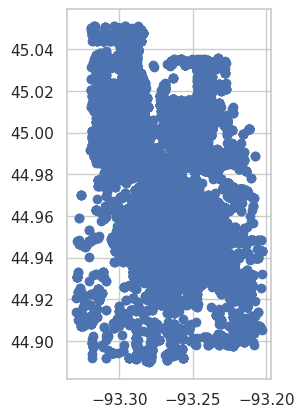

In [28]:
police_force_gdf.query("CenterLongitude != 0").plot()

<GeoAxesSubplot: >

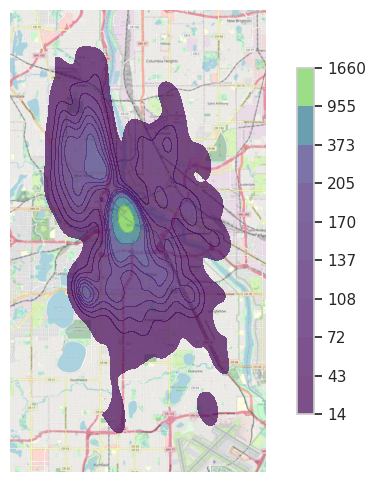

In [29]:
ax = gplt.kdeplot(
    police_force_gdf.query("CenterLongitude != 0"),
    projection=gcrs.WebMercator(),
    cmap='viridis',
    fill=True,
    alpha=0.7,
    cbar=True,
    cbar_kws={"orientation": "vertical", "shrink": .75, "pad": 0.05},
)
# gplt.pointplot(police_force_gdf.query("CenterLongitude != 0"), s=0.5, color="black", alpha=0.5, ax=ax)
gplt.webmap(
    police_force_gdf.query("CenterLongitude != 0"),
    projection=gcrs.WebMercator(),
    # provider=cx.providers.Stamen.TonerLite,
    ax=ax
)

In [30]:
police_force_race = police_force_df.groupby("Race", as_index=False).agg(stop_nm=("PoliceUseOfForceID", "count"))
police_force_race["stop_perc"] = police_force_race["stop_nm"] / police_force_df.shape[0] * 100
police_force_race

,Race,stop_nm,stop_perc
0,Asian,457,1.166352
1,Black,22436,57.260987
2,N/A,1392,3.552652
3,Native American,1973,5.035475
4,Other / Mixed Race,1095,2.794651
5,Pacific Islander,9,0.022970
6,Unknown,941,2.401613
7,White,8819,22.507784
8,not recorded,2060,5.257516


In [31]:
police_force_race = police_force_race.merge(demographics_race, left_on="Race", right_on="race", how="outer")
police_force_race

,Race,stop_nm,stop_perc,race,pop_perc
0,Asian,457.0,1.166352,Asian,5.7
1,Black,22436.0,57.260987,Black,18.4
2,N/A,1392.0,3.552652,NaN,NaN
3,Native American,1973.0,5.035475,Native American,1.3
4,Other / Mixed Race,1095.0,2.794651,NaN,NaN
5,Pacific Islander,9.0,0.022970,NaN,NaN
6,Unknown,941.0,2.401613,NaN,NaN
7,White,8819.0,22.507784,White,63.1
8,not recorded,2060.0,5.257516,NaN,NaN
9,NaN,NaN,NaN,Latino,9.8


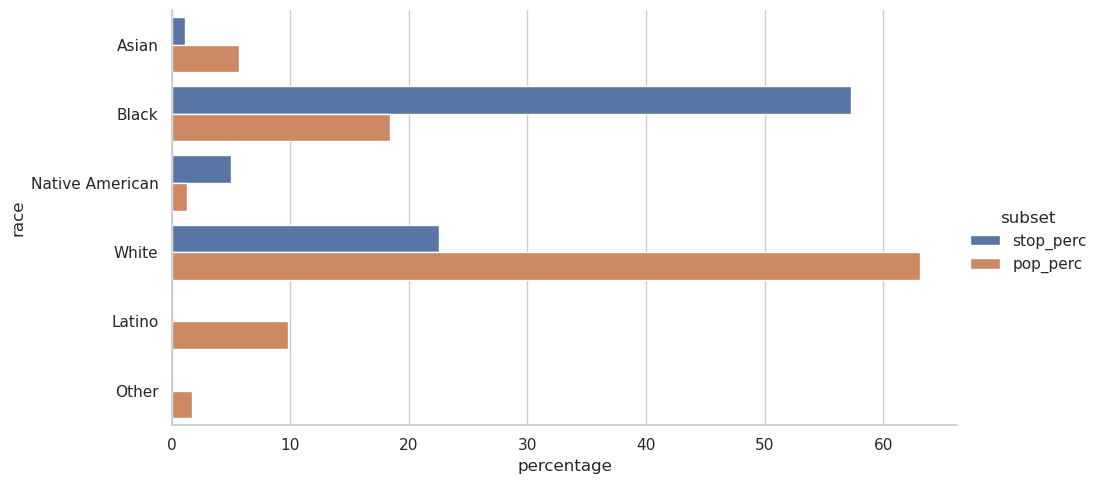

In [32]:
sns.catplot(
    data=police_force_race.melt(id_vars="race", value_vars=["stop_perc", "pop_perc"], var_name="subset", value_name="percentage"),
    x="percentage",
    y="race",
    hue="subset",
    kind="bar",
    aspect=2
)

In [33]:
from ydata_profiling import ProfileReport

/home/aoguedao/mambaforge/envs/sciml-edu/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/home/aoguedao/mambaforge/envs/sciml-edu/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [34]:
profile_stop = ProfileReport(police_stop_df, title="Police Stop Profiling Report")
profile_stop.to_file("police_stop_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
profile_force = ProfileReport(police_force_df, title="Police Force Profiling Report")
profile_force.to_file("police_force_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]